In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import sklearn.metrics as m
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
pd.set_option('display.max_columns',None)

In [85]:
df = pd.read_csv('C:/Users/saroj/Documents/machine lerning/cps_85_wages.csv')

In [86]:
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


<AxesSubplot: >

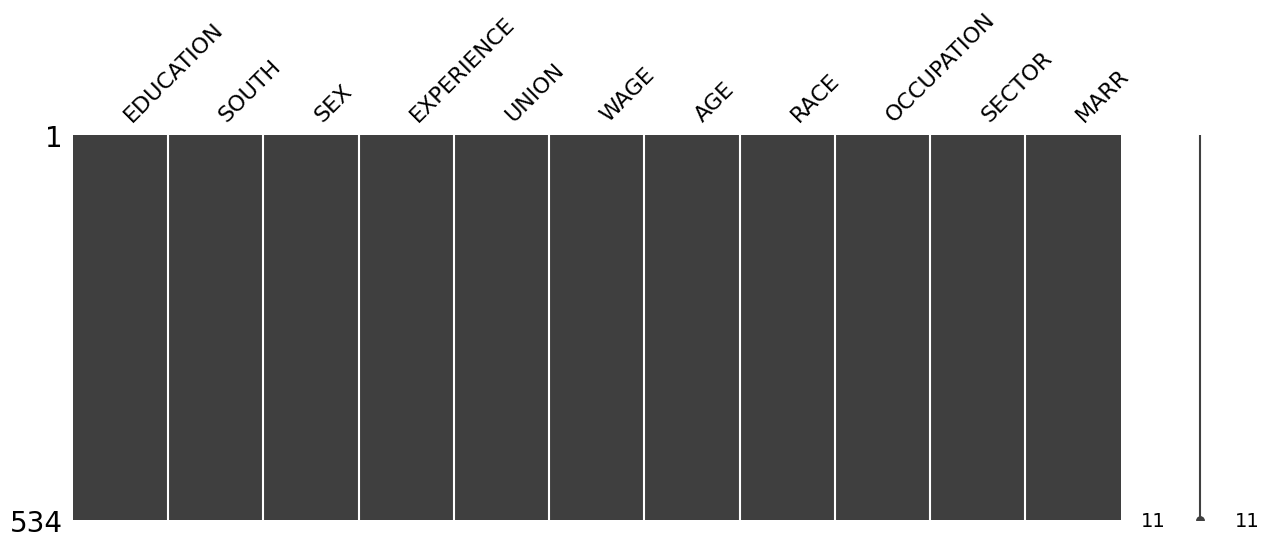

In [87]:
mso.matrix(df,figsize=(15,5))

In [88]:
for col in df:
    print(f'{col:25} {df[col].nunique()},values')

EDUCATION                 17,values
SOUTH                     2,values
SEX                       2,values
EXPERIENCE                52,values
UNION                     2,values
WAGE                      238,values
AGE                       47,values
RACE                      3,values
OCCUPATION                6,values
SECTOR                    3,values
MARR                      2,values


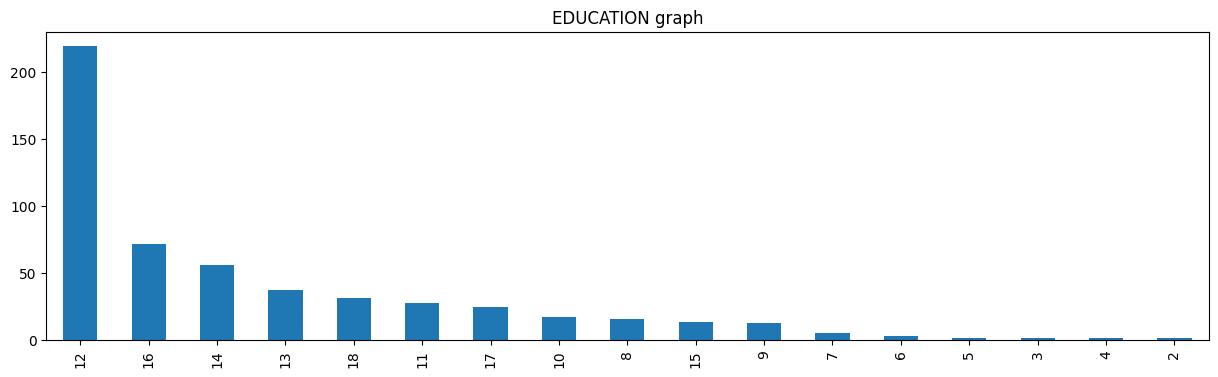

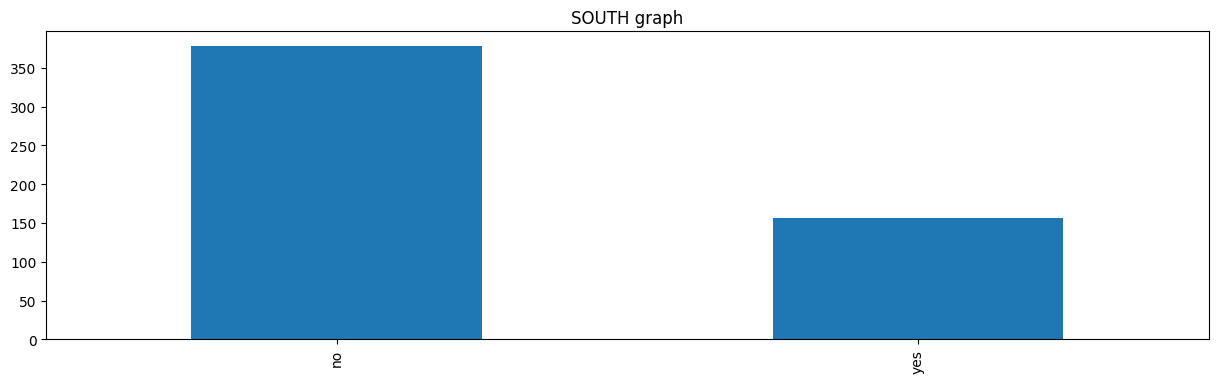

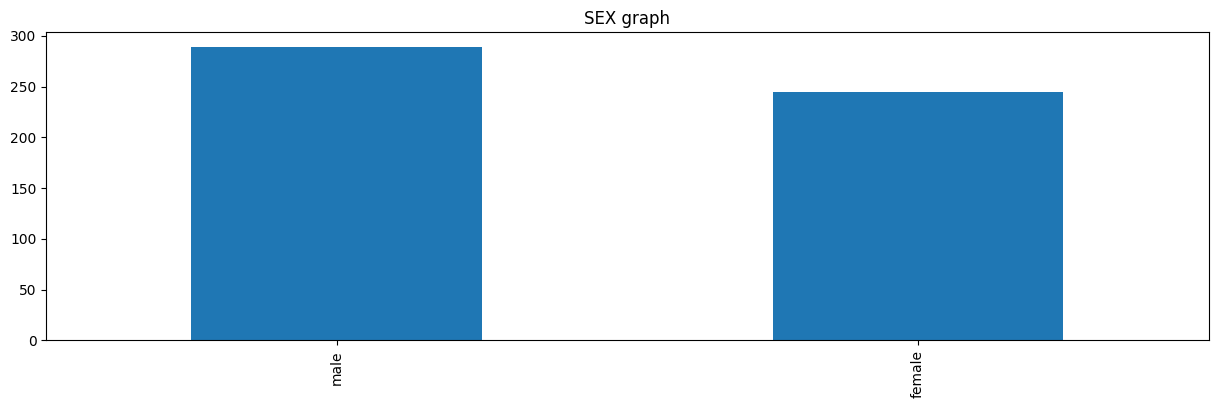

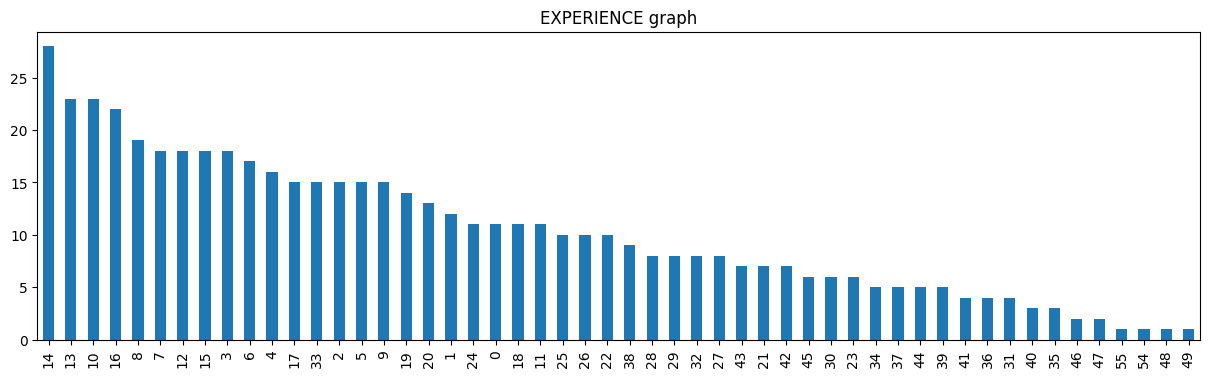

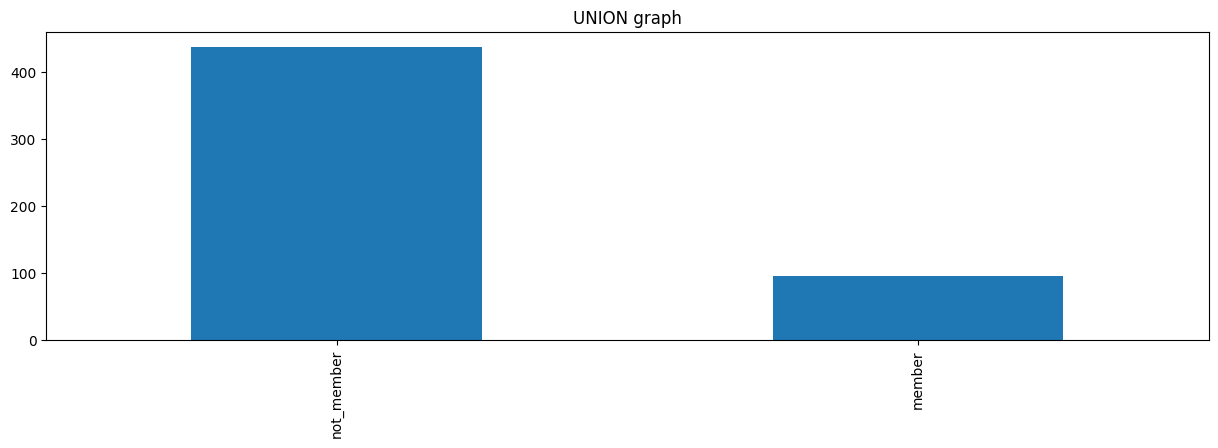

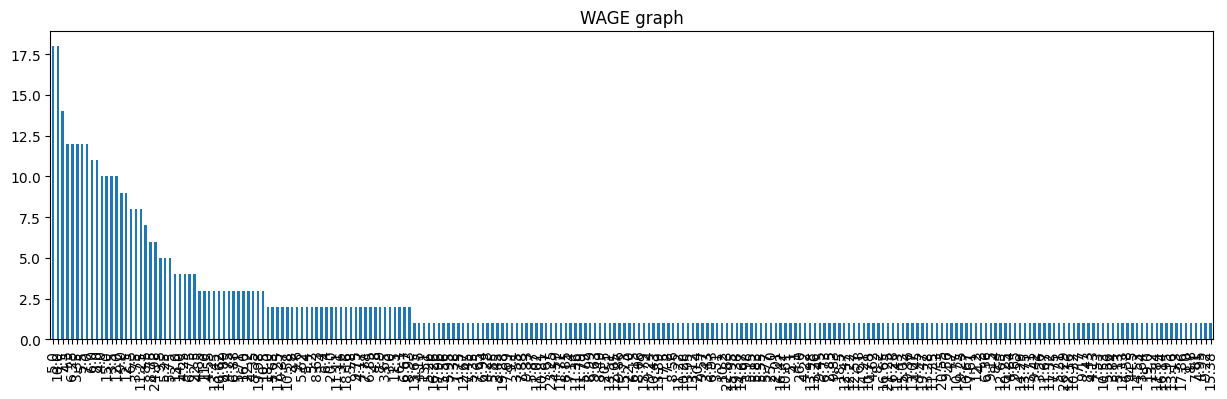

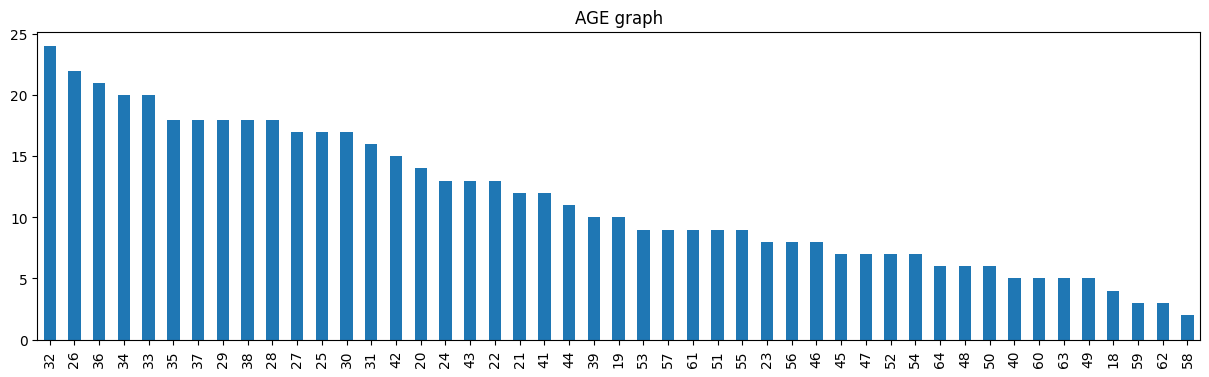

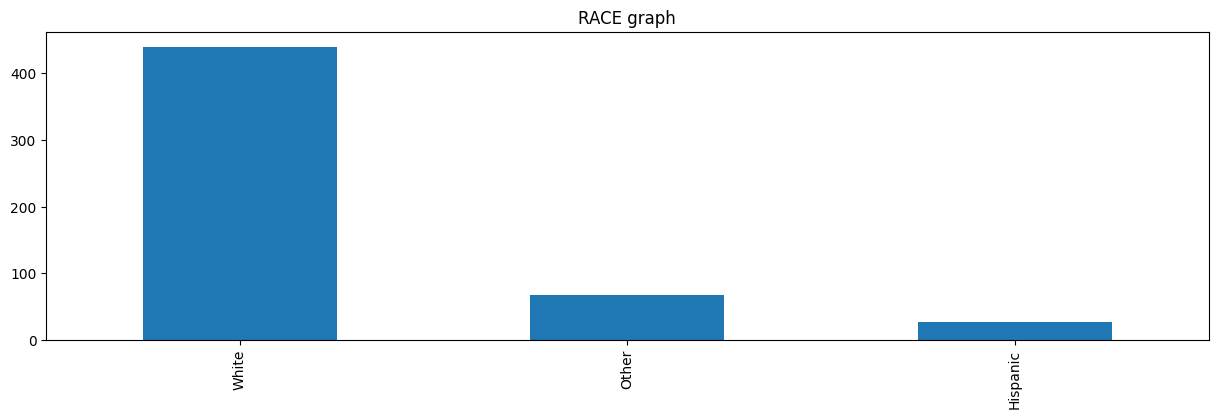

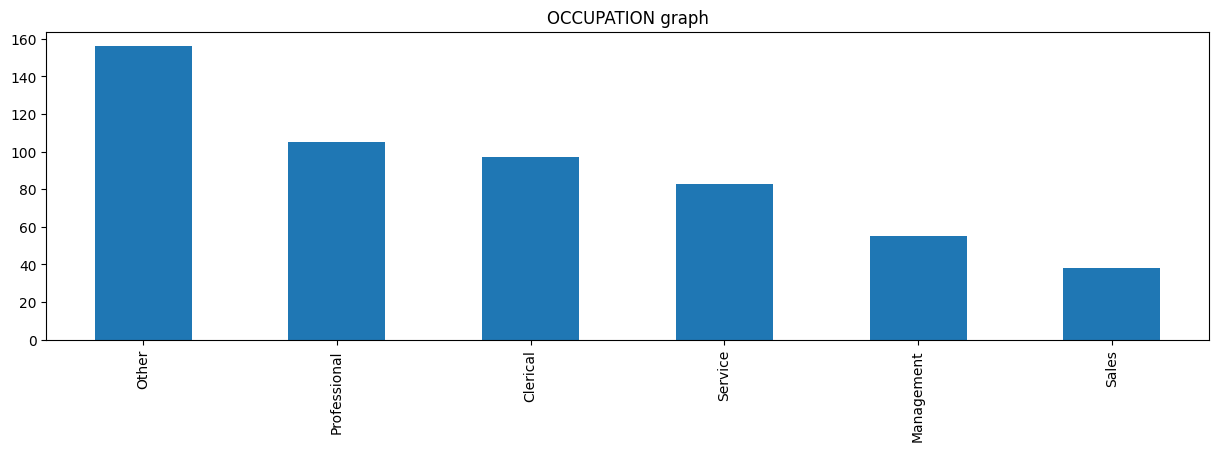

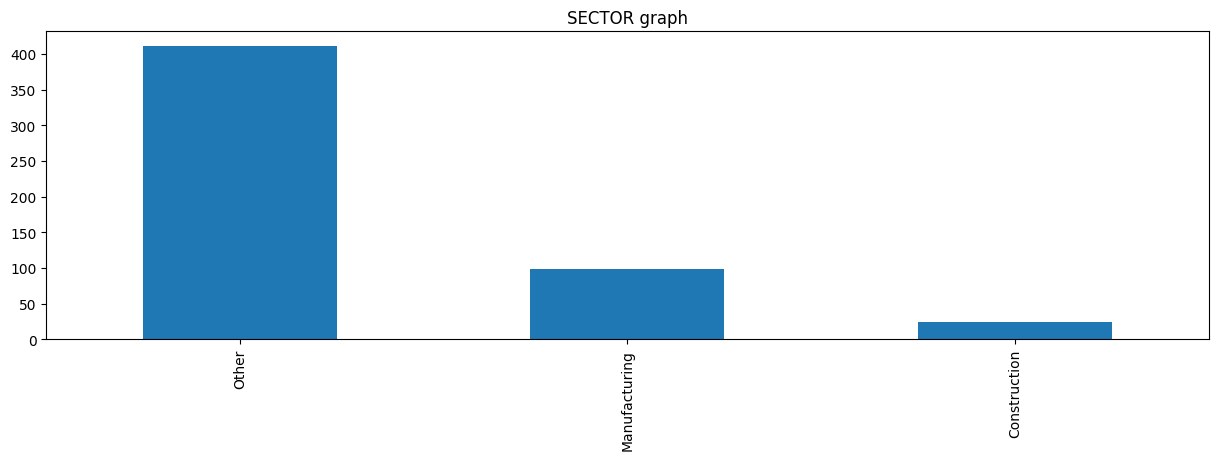

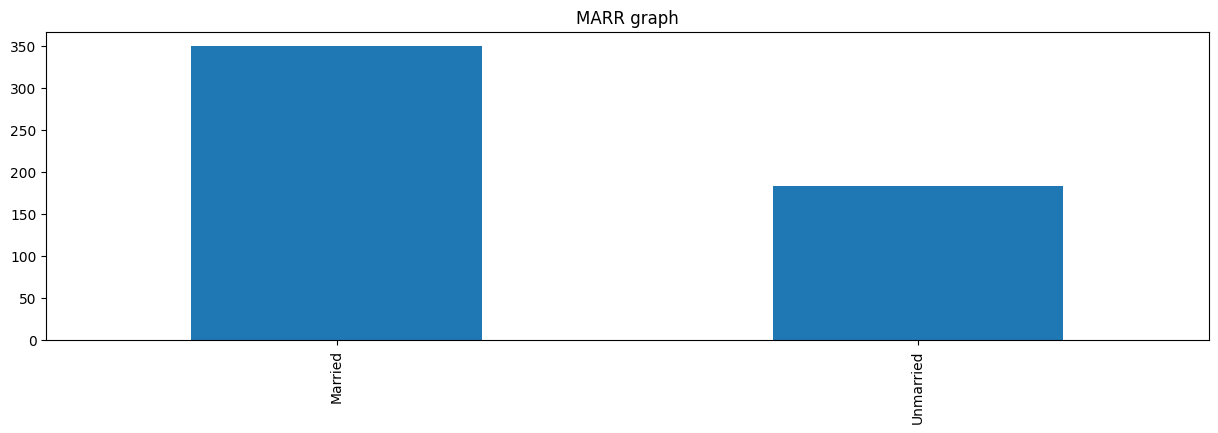

In [89]:
for col in df:
    df[col].value_counts().plot(kind='bar',title=f'{col} graph', figsize=(15,4))
    plt.show()

In [90]:
df.columns

Index(['EDUCATION', 'SOUTH', 'SEX', 'EXPERIENCE', 'UNION', 'WAGE', 'AGE',
       'RACE', 'OCCUPATION', 'SECTOR', 'MARR'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUCATION   534 non-null    int64  
 1   SOUTH       534 non-null    object 
 2   SEX         534 non-null    object 
 3   EXPERIENCE  534 non-null    int64  
 4   UNION       534 non-null    object 
 5   WAGE        534 non-null    float64
 6   AGE         534 non-null    int64  
 7   RACE        534 non-null    object 
 8   OCCUPATION  534 non-null    object 
 9   SECTOR      534 non-null    object 
 10  MARR        534 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 46.0+ KB


In [92]:
num_cols=['EDUCATION','EXPERIENCE','AGE']
catg_cols=['SOUTH','SEX','UNION','RACE','OCCUPATION','SECTOR', 'MARR']

<AxesSubplot: xlabel='EDUCATION', ylabel='WAGE'>

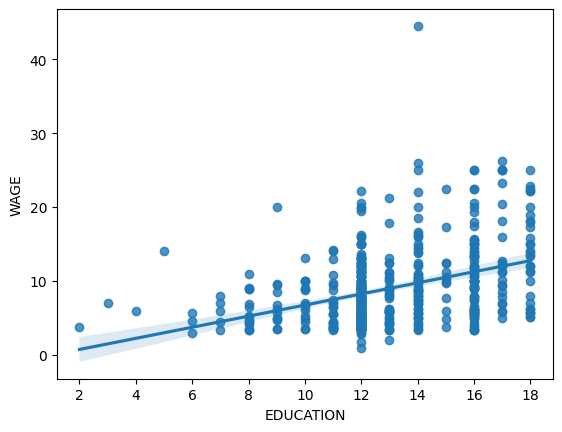

In [93]:
sns.regplot(x='EDUCATION',y='WAGE',data=df)

<AxesSubplot: xlabel='EXPERIENCE', ylabel='WAGE'>

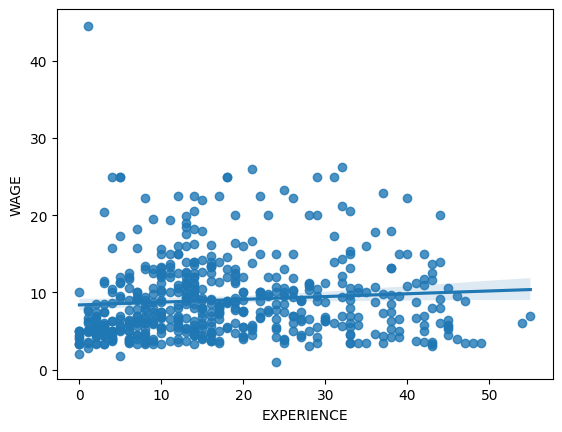

In [94]:
sns.regplot(x='EXPERIENCE',y='WAGE',data=df)

<AxesSubplot: xlabel='AGE', ylabel='WAGE'>

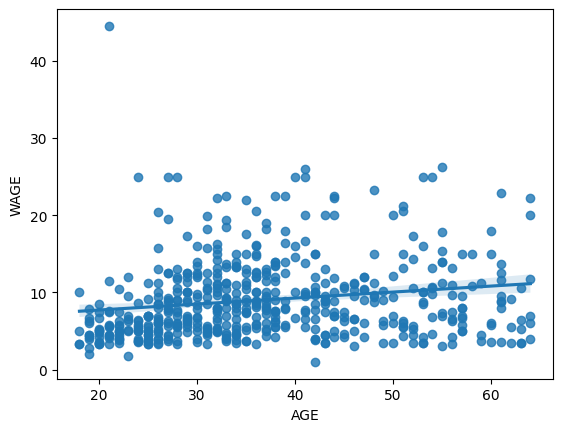

In [95]:
sns.regplot(x='AGE',y='WAGE',data=df)

<AxesSubplot: xlabel='SOUTH', ylabel='WAGE'>

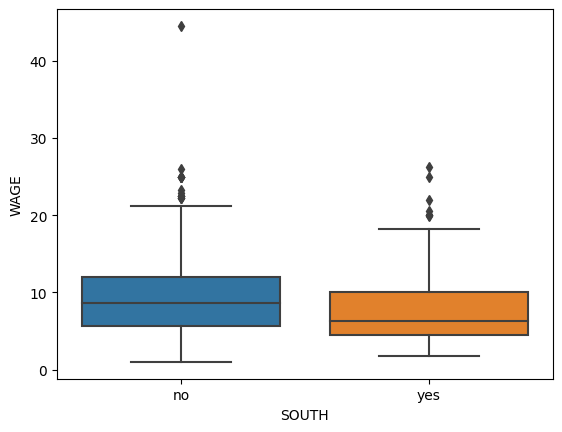

In [96]:
sns.boxplot(x='SOUTH',y='WAGE',data=df)

<AxesSubplot: xlabel='SEX', ylabel='WAGE'>

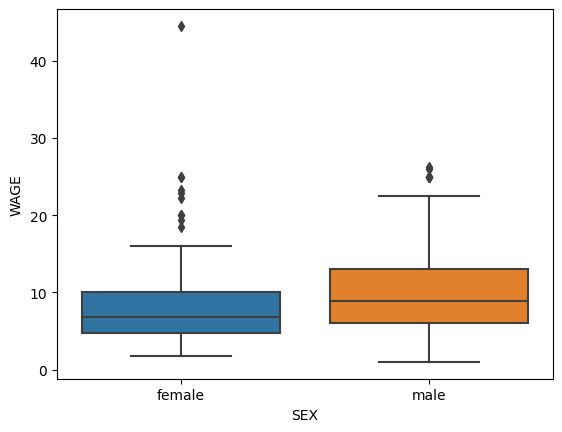

In [97]:
sns.boxplot(x='SEX',y='WAGE',data=df)

<AxesSubplot: xlabel='UNION', ylabel='WAGE'>

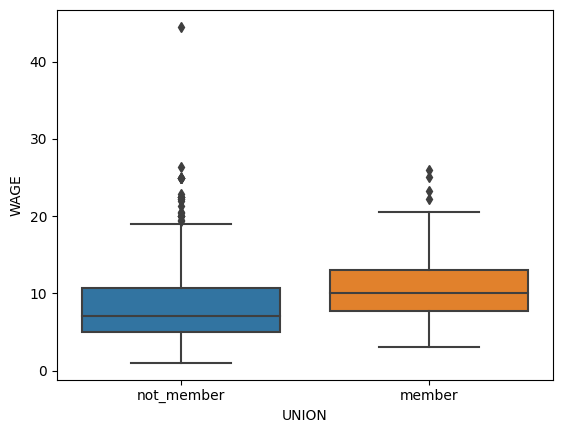

In [98]:
sns.boxplot(x='UNION',y='WAGE',data=df)

<AxesSubplot: xlabel='RACE', ylabel='WAGE'>

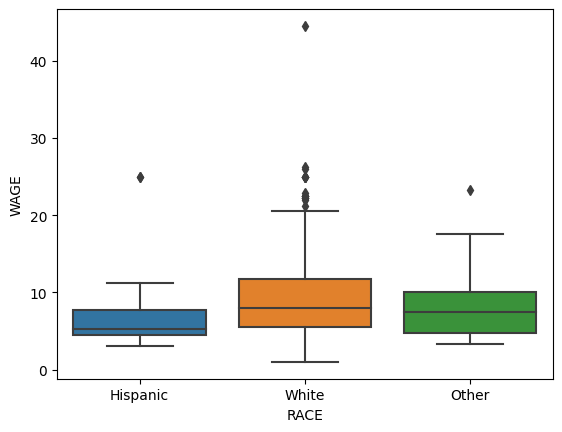

In [99]:
sns.boxplot(x='RACE',y='WAGE',data=df)

<AxesSubplot: xlabel='OCCUPATION', ylabel='WAGE'>

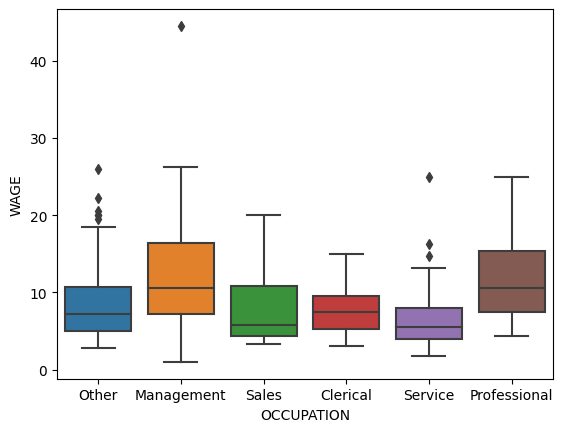

In [100]:
sns.boxplot(x='OCCUPATION',y='WAGE',data=df)

<AxesSubplot: xlabel='SECTOR', ylabel='WAGE'>

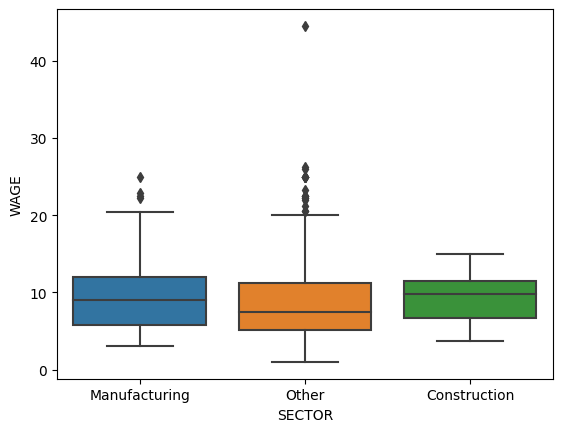

In [101]:
sns.boxplot(x='SECTOR',y='WAGE',data=df)

<AxesSubplot: xlabel='MARR', ylabel='WAGE'>

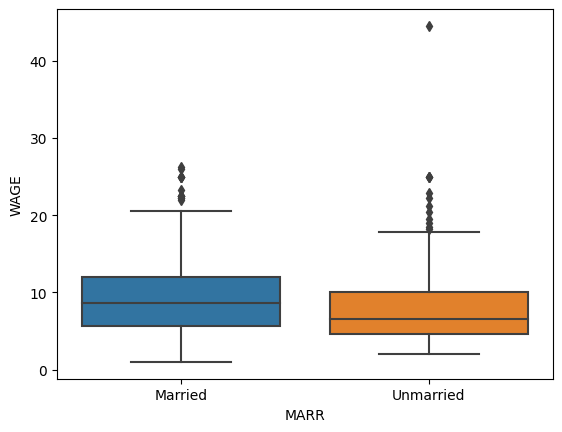

In [102]:
sns.boxplot(x='MARR',y='WAGE',data=df)

In [103]:
df.corrwith(df['WAGE'])

C:\Users\saroj\AppData\Local\Temp\ipykernel_3952\50681580.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['WAGE'])


EDUCATION     0.381922
EXPERIENCE    0.087060
WAGE          1.000000
AGE           0.176967
dtype: float64

In [107]:
X=df[['EDUCATION','AGE']]
y=df['WAGE']

In [108]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X.values,y.values,train_size=.2,random_state=1)

In [109]:
model = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('reg',LinearRegression())

])

In [112]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('scale', StandardScaler()), ('reg', LinearRegression())])

In [113]:
ypred = model.predict(Xtest)
print(f'Acc: {r2_score(ytest,ypred)}')
print(f'MSE: {mean_squared_error(ytest,ypred)}')
print(f'MAE: {mean_absolute_error(ytest,ypred)}')

Acc: 0.1598046992882608
MSE: 23.849303418157483
MAE: 3.3880628369141803
